# Práctica 1 - Aprendizaje Automático
## Predicción del abandono (Attrition) de empleados

**Autores:** Elena Recio Álvarez (100495725), Alejandra Castuera García (100499172
)

En este notebook realizamos un análisis exploratorio simplificado (EDA) del conjunto de datos proporcionado. El objetivo es entender la estructura del dataset, identificar posibles problemas de calidad y preparar el conjunto para su uso en modelos de predicción.

Este análisis nos permitirá:
- Conocer el tipo de problema (clasificación o regresión)
- Detectar valores nulos
- Clasificar las variables según su tipo
- Identificar variables inútiles (constantes o tipo ID)
- Evaluar el balanceo de clases en la variable objetivo (`Attrition`)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Carga de datos

Se carga el archivo `attrition_availabledata_07.csv.gz` con información de empleados. Este archivo debe subirse manualmente al entorno de Google Colab.


In [ ]:
df = pd.read_csv("attrition_availabledata_07.csv.gz")
df.head()


,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.839499,6,3,3,3.0,3.0,4.0,40,Travel_Rarely,Research & Development,...,Y,17,8,0,21.0,4,20,4,9,No
1,7.204763,10,3,3,3.0,4.0,3.0,42,Travel_Rarely,Research & Development,...,Y,15,8,0,10.0,5,10,2,2,No
2,6.272837,12,2,3,2.0,1.0,3.0,38,Travel_Rarely,Sales,...,Y,18,8,0,11.0,5,7,1,7,No
3,6.038788,13,4,3,3.0,2.0,3.0,40,Travel_Frequently,Research & Development,...,Y,13,8,1,8.0,3,8,3,7,No
4,6.726167,17,3,3,2.0,2.0,3.0,36,Travel_Frequently,Research & Development,...,Y,13,8,0,6.0,5,6,0,3,No


## Información básica del dataset

Comprobamos el número de instancias y variables, y observamos los tipos de datos.


In [ ]:
print("Dimensiones del dataset:", df.shape)
df.info()


Dimensiones del dataset: (2940, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2920 non-null   float64
 5   JobSatisfaction          2924 non-null   float64
 6   WorkLifeBalance          2916 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   i

## Valores nulos

Verificamos si existen valores faltantes y cuántos hay por variable.


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
WorkLifeBalance,24
EnvironmentSatisfaction,20
JobSatisfaction,16
NumCompaniesWorked,15
TotalWorkingYears,7
JobInvolvement,0
absences,0
Age,0
BusinessTravel,0
Department,0


## Tipos de variables

Distinguimos entre variables categóricas y numéricas. Las ordinales se marcarán aparte si procede.


In [ ]:
columnas_categoricas = df.select_dtypes(include='object').columns.tolist()
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Columnas categóricas:", columnas_categoricas)
print("\nColumnas numéricas:", columnas_numericas)


Columnas categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']

Columnas numéricas: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## Cardinalidad de variables categóricas

Se analiza la cantidad de valores distintos en las columnas categóricas, para detectar posibles problemas de alta cardinalidad.


In [ ]:
df[columnas_categoricas].nunique().sort_values(ascending=False)


,0
JobRole,9
EducationField,6
Department,3
BusinessTravel,3
MaritalStatus,3
Gender,2
Attrition,2
Over18,1


## Columnas constantes

Buscamos variables que tienen un único valor en todo el dataset y por tanto no aportan información al modelo.


In [ ]:
df.nunique()[df.nunique() == 1]


,0
EmployeeCount,1
Over18,1
StandardHours,1


## Columna identificadora (ID)

`EmployeeID` es una columna de identificación única por empleado, sin valor predictivo. Se eliminará junto a las constantes.


## Análisis de la variable objetivo: `Attrition`

Queremos predecir si un empleado abandonará la empresa (`Yes`) o no (`No`). Analizamos la distribución para ver si hay desbalanceo de clases.


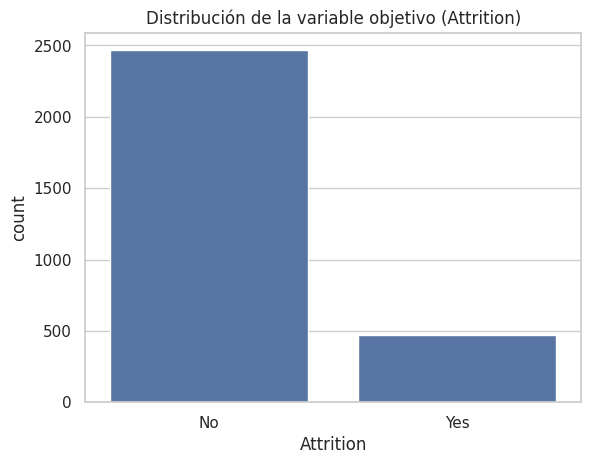

In [ ]:
df['Attrition'].value_counts(normalize=True)
sns.countplot(data=df, x='Attrition')
plt.title("Distribución de la variable objetivo (Attrition)")
plt.show()


**Conclusión parcial:**  
La clase positiva (`Yes`) representa solo un 16% de los casos, lo que indica un claro desbalanceo que deberemos tener en cuenta al entrenar los modelos.


## Limpieza del dataset

Eliminamos las columnas que no aportan valor predictivo: las constantes y la columna identificadora.


In [ ]:
columnas_a_eliminar = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID']
df = df.drop(columns=columnas_a_eliminar)
df.shape


(2940, 27)

## 📋 Resumen del EDA

- **Instancias:** 2940  
- **Variables (tras limpieza):** 27  
- **Variables categóricas:** 7 (`BusinessTravel`, `Department`, `EducationField`, `Gender`, `JobRole`, `MaritalStatus`, `Attrition`)  
- **Variables numéricas:** 20  
- **Variables ordinales (lógicas):** `JobLevel`, `Education`, `StockOptionLevel`  
- **Variables con alta cardinalidad:** `JobRole`, `EducationField`  
- **Variables con valores faltantes:** Ninguna importante  
- **Columnas eliminadas:** `EmployeeCount`, `Over18`, `StandardHours`, `EmployeeID`  
- **Tipo de problema:** Clasificación  
- **¿Desbalanceado?:** Sí. `Attrition = Yes` representa el 16% de los datos  
